In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [12]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [13]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [14]:
# Loading dataset
mkt_input = pd.read_csv("D:\Study 2\Python\Project\marketing_campaign.csv", sep="\t")
mkt_input.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [15]:
mkt_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [16]:
mkt = mkt_input.copy()

In [17]:
mkt['Age'] = 2021-mkt['Year_Birth']
mkt['Living_With'] = mkt['Marital_Status'].replace({'Married' : 'Partner', 'Together' : 'Partner', 'Single' : 'Alone', 'Divorced' : 'Alone', 'Widow' : 'Alone', 'YOLO' : 'Alone', 'Absurd' : 'Alone'})
mkt['Children'] = mkt['Kidhome'] + mkt['Teenhome']
mkt['Family_Size'] = mkt['Living_With'].replace({'Alone' : 1, 'Partner' : 2}) + mkt['Children']

In [18]:
mkt["Education"]=mkt["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
mkt['Dt_Customer'] = pd.to_datetime(mkt['Dt_Customer'])
dates = []
for i in mkt["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


In [19]:
mkt.rename(columns={'MntWines':'Wines', 
                   'MntFruits':'Fruits', 
                   'MntMeatProducts':'Meat', 
                   'MntFishProducts':'Fish', 
                   'MntSweetProducts':'Sweets', 
                   'MntGoldProds':'Gold', 
                   'NumWebPurchases':'Web_Purchases', 
                   'NumCatalogPurchases':'Catalog_Purchases', 
                   'NumStorePurchases':'Store_Purchases', 
                   'NumWebVisitsMonth':'WebVisits_Month',
                   'NumDealsPurchases':'Discount_Purchases',
                   'AcceptedCmp1' : 'First_Promotion', 
                   'AcceptedCmp2' : 'Second_Promotion', 
                   'AcceptedCmp3' : 'Third_Promotion', 
                   'AcceptedCmp4' : 'Fourth_Promotion',
                   'AcceptedCmp5' : 'Fifth_Promotion', 
                   'Response' : 'Last_Promotion'}, inplace=True)
mkt['Spent'] = mkt['Wines'] + mkt['Fruits'] + mkt['Meat'] + mkt['Fish'] + mkt['Sweets'] + mkt['Gold']
mkt.drop(['Z_CostContact','Z_Revenue'], axis = 1, inplace = True)

In [20]:
print(mkt)

         ID  Year_Birth     Education Marital_Status   Income  Kidhome  \
0      5524        1957      Graduate         Single  58138.0        0   
1      2174        1954      Graduate         Single  46344.0        1   
2      4141        1965      Graduate       Together  71613.0        0   
3      6182        1984      Graduate       Together  26646.0        1   
4      5324        1981  Postgraduate        Married  58293.0        1   
...     ...         ...           ...            ...      ...      ...   
2235  10870        1967      Graduate        Married  61223.0        0   
2236   4001        1946  Postgraduate       Together  64014.0        2   
2237   7270        1981      Graduate       Divorced  56981.0        0   
2238   8235        1956  Postgraduate       Together  69245.0        0   
2239   9405        1954  Postgraduate        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  Wines  ...  Fifth_Promotion  \
0            0  2012-04-09       58    635 

In [21]:
mkt.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'Discount_Purchases', 'Web_Purchases',
       'Catalog_Purchases', 'Store_Purchases', 'WebVisits_Month',
       'Third_Promotion', 'Fourth_Promotion', 'Fifth_Promotion',
       'First_Promotion', 'Second_Promotion', 'Complain', 'Last_Promotion',
       'Age', 'Living_With', 'Children', 'Family_Size', 'Spent'],
      dtype='object')

# Data Cleaning 

In [22]:
# Defines a function for Missing values
def missing_value_of_data(data):
    total=data.isnull().sum().sort_values(ascending=False)
    percentage=round(total/data.shape[0]*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [23]:
missing_value_of_data(mkt)

,Total,Percentage
Income,24,1.07
Spent,0,0.00
Family_Size,0,0.00
Year_Birth,0,0.00
Education,0,0.00
Marital_Status,0,0.00
Kidhome,0,0.00
Teenhome,0,0.00
Dt_Customer,0,0.00
Recency,0,0.00


In [24]:
mkt.dropna(subset=['Income'], inplace=True)

In [25]:
mkt

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Fifth_Promotion,First_Promotion,Second_Promotion,Complain,Last_Promotion,Age,Living_With,Children,Family_Size,Spent
0,5524,1957,Graduate,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,1,64,Alone,0,1,1617
1,2174,1954,Graduate,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,67,Alone,2,3,27
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,56,Partner,0,2,776
3,6182,1984,Graduate,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,37,Partner,1,3,53
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,40,Partner,1,3,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,54,Partner,1,3,1341
2236,4001,1946,Postgraduate,Together,64014.0,2,1,2014-10-06,56,406,...,0,1,0,0,0,75,Partner,3,5,444
2237,7270,1981,Graduate,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,0,40,Alone,0,1,1241
2238,8235,1956,Postgraduate,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,65,Partner,1,3,843


In [26]:
# Defines a function for Duplicated Values
def duplicated_values_data(data):
    dup=[]
    columns=data.columns
    for i in data.columns:
        dup.append(sum(data[i].duplicated()))
    return pd.concat([pd.Series(columns),pd.Series(dup)],axis=1,keys=['Columns','Duplicate count'])

In [27]:
duplicated_values_data(mkt)

,Columns,Duplicate count
0,ID,0
1,Year_Birth,2157
2,Education,2213
3,Marital_Status,2208
4,Income,242
5,Kidhome,2213
6,Teenhome,2213
7,Dt_Customer,1554
8,Recency,2116
9,Wines,1440


### <span style="color:green">Data distribution </span>

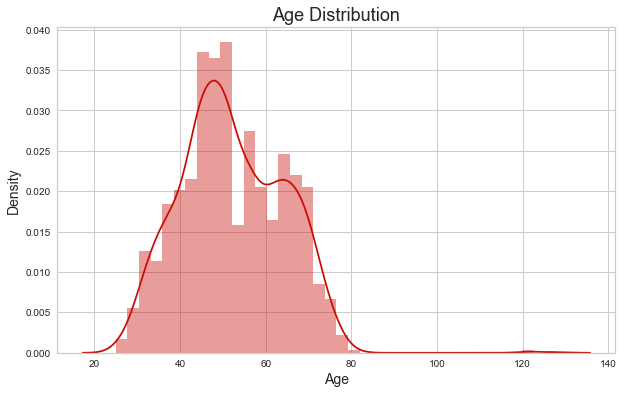

In [28]:
plt.figure(figsize=(10,6))
sns.distplot(mkt['Age'],color='r')
plt.title('Age Distribution',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Density',size=14)
plt.show()

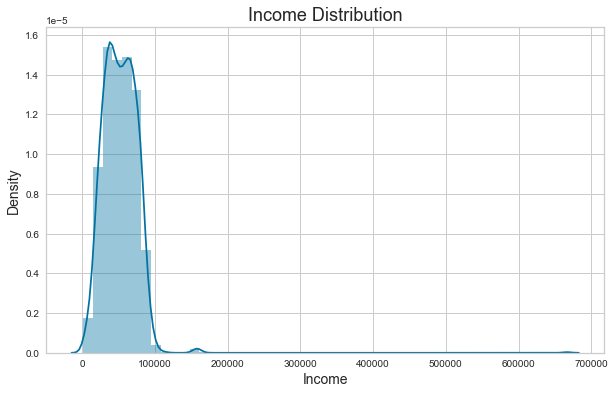

In [29]:
plt.figure(figsize=(10,6))
sns.distplot(mkt['Income'],color='b')
plt.title('Income Distribution',size=18)
plt.xlabel('Income',size=14)
plt.ylabel('Density',size=14)
plt.show()

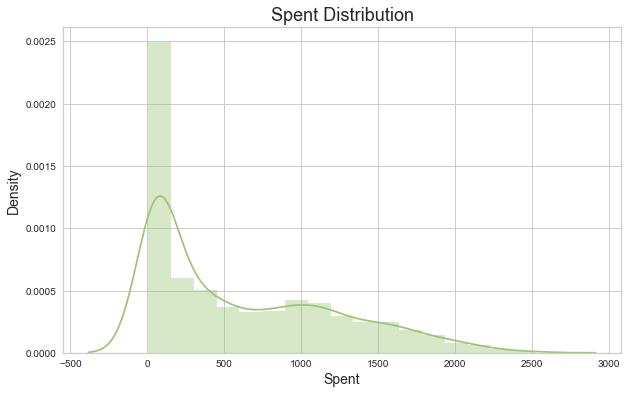

In [30]:
plt.figure(figsize=(10,6))
sns.distplot(mkt['Spent'],color='g')
plt.title('Spent Distribution',size=18)
plt.xlabel('Spent',size=14)
plt.ylabel('Density',size=14)
plt.show()

In [31]:
mkt[['Age','Income','Spent']].describe()

,Age,Income,Spent
count,2216.000000,2216.000000,2216.000000
mean,52.179603,52247.251354,607.075361
std,11.985554,25173.076661,602.900476
min,25.000000,1730.000000,5.000000
25%,44.000000,35303.000000,69.000000
50%,51.000000,51381.500000,396.500000
75%,62.000000,68522.000000,1048.000000
max,128.000000,666666.000000,2525.000000


In [32]:
mkt[['Age','Income','Spent']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2216.0,52.179603,11.985554,25.0,44.0,51.0,62.0,128.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0
Spent,2216.0,607.075361,602.900476,5.0,69.0,396.5,1048.0,2525.0


In [33]:
mkt.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,Fourth_Promotion,Fifth_Promotion,First_Promotion,Second_Promotion,Complain,Last_Promotion,Age,Children,Family_Size,Spent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,52.179603,0.947202,2.592509,607.075361
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,0.749062,0.905722,602.900476
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,1.000000,5.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,2.000000,69.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000,1.000000,3.000000,396.500000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,1.000000,3.000000,1048.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,128.000000,3.000000,5.000000,2525.000000


In [34]:
mkt #education, marital_status, living_with

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Fifth_Promotion,First_Promotion,Second_Promotion,Complain,Last_Promotion,Age,Living_With,Children,Family_Size,Spent
0,5524,1957,Graduate,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,1,64,Alone,0,1,1617
1,2174,1954,Graduate,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,67,Alone,2,3,27
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,56,Partner,0,2,776
3,6182,1984,Graduate,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,37,Partner,1,3,53
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,40,Partner,1,3,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,54,Partner,1,3,1341
2236,4001,1946,Postgraduate,Together,64014.0,2,1,2014-10-06,56,406,...,0,1,0,0,0,75,Partner,3,5,444
2237,7270,1981,Graduate,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,0,40,Alone,0,1,1241
2238,8235,1956,Postgraduate,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,65,Partner,1,3,843


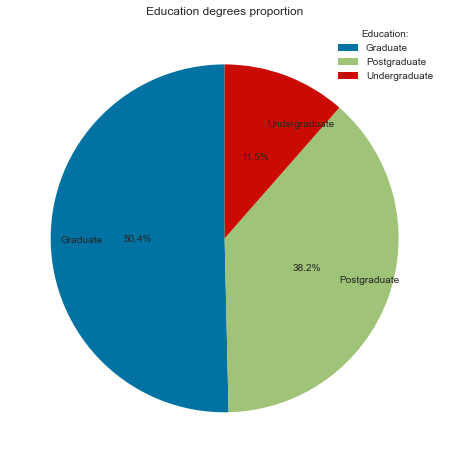

In [35]:
Edu_count = dict(mkt.groupby(['Education'])['Education'].count())
plt.figure(figsize=(12, 8))
plt.title("Education degrees proportion")
plt.pie(Edu_count.values(),labels=Edu_count.keys(),startangle = 90,autopct="%.1f%%",pctdistance=0.5,labeldistance=0.7)
plt.legend(title='Education:',loc=1)
plt.show()

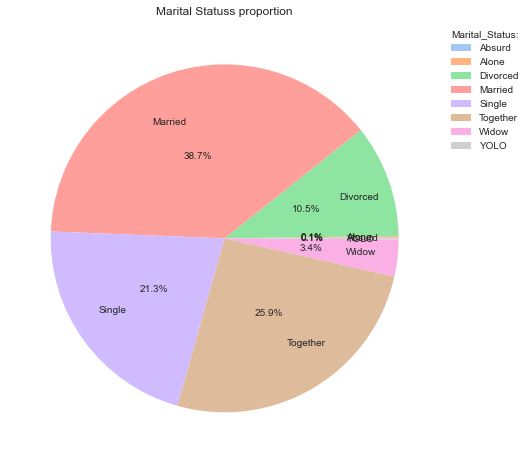

In [36]:
Marital_Status_count = dict(mkt.groupby(['Marital_Status'])['Marital_Status'].count())
plt.figure(figsize=(12, 8))
plt.title("Marital Statuss proportion")
plt.pie(Marital_Status_count.values(),labels=Marital_Status_count.keys(),autopct="%.1f%%",pctdistance=0.5,labeldistance=0.7,
       colors=sns.color_palette("pastel"))
plt.legend(title='Marital_Status:', bbox_to_anchor=(1,1))
plt.show()

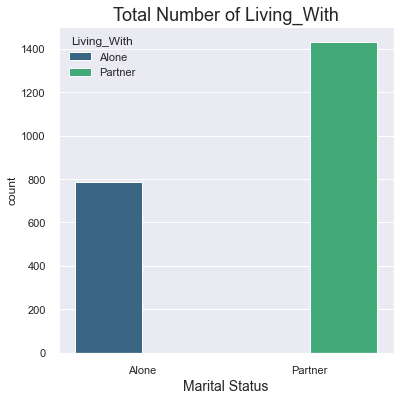

In [37]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid")
sns.countplot(x = 'Living_With', data = mkt, palette = 'viridis',hue='Living_With',saturation=0.8)
plt.title('Total Number of Living_With',size=18)
plt.xlabel('Marital Status',size=14)
plt.show()

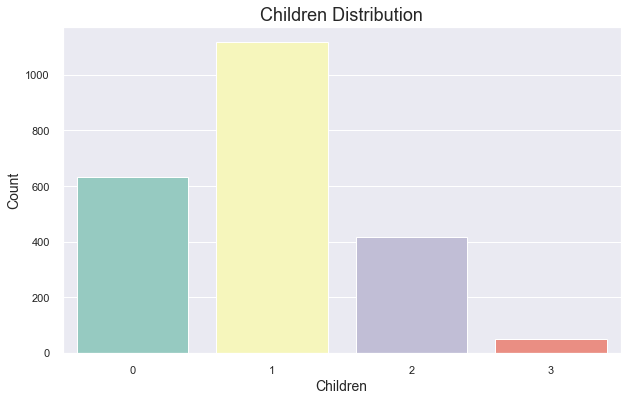

In [38]:
plt.figure(figsize = (10,6))
sns.countplot(mkt["Children"], palette = 'Set3')
plt.title('Children Distribution',size=18)
plt.xlabel('Children',size=14)
plt.ylabel('Count',size=14)
plt.show()

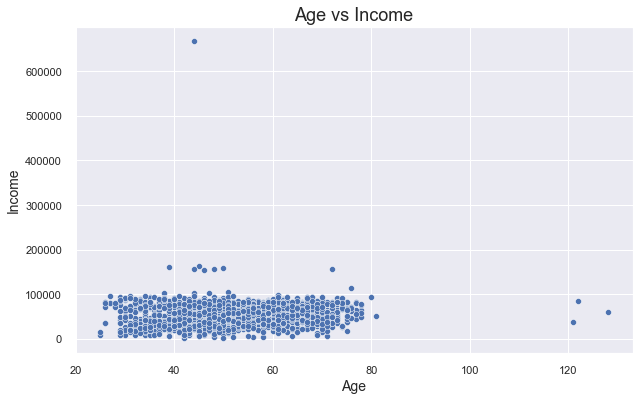

In [39]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='Age',y='Income',color='b',data=mkt)
plt.title('Age vs Income',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Income',size=14)
plt.show()

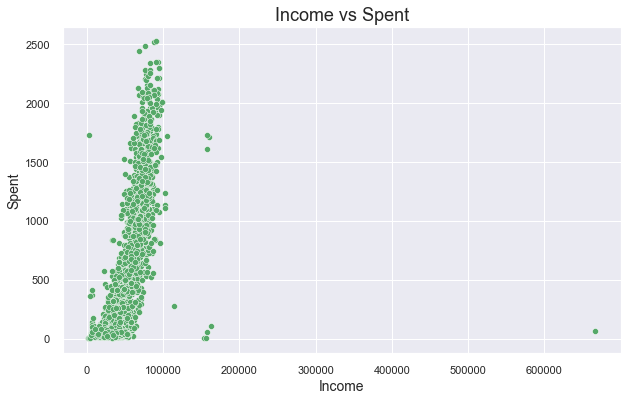

In [40]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='Income',y='Spent',color='g',data=mkt)
plt.title('Income vs Spent',size=18)
plt.xlabel('Income',size=14)
plt.ylabel('Spent',size=14)
plt.show()

In [41]:
print('Correlation between spent and income is : {}'.format(round(mkt.corr()['Income']['Spent'],3)))

Correlation between spent and income is : 0.668


In [42]:
np.corrcoef(mkt['Income'], mkt['Spent'])

array([[1.        , 0.66757609],
       [0.66757609, 1.        ]])

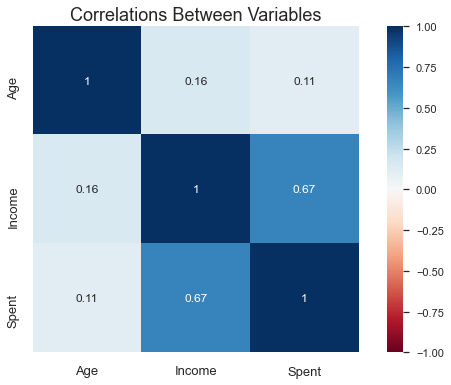

In [43]:
plt.figure(figsize = (10,6))
sns.heatmap(mkt[['Age','Income','Spent']].corr(),annot=True,square=True,
            cmap='RdBu',
            vmax=1,
            vmin=-1)
plt.title('Correlations Between Variables',size=18);
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

# KMeans

##### Elbow method

In [44]:
from scipy.cluster.vq import kmeans, vq

In [45]:
distortions = []
num_clusters = range (2,7)
for i in num_clusters:
    centroids, distortion = kmeans(mkt[['Age','Income']], i)
    distortions.append(distortion)

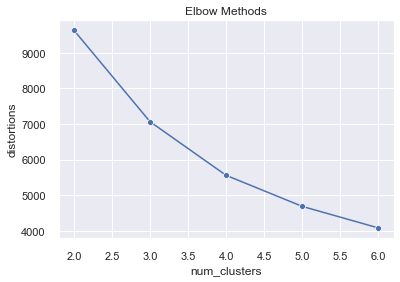

In [46]:
elbow_plot_data = pd.DataFrame ({'num_clusters':num_clusters, 'distortions': distortions})
sns.lineplot(x='num_clusters',y='distortions',data=elbow_plot_data,
    marker='o')
plt.title('Elbow Methods')
plt.show()

In [47]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

In [74]:
from visualizer import Visualizer
import matplotlib.pyplot as plt

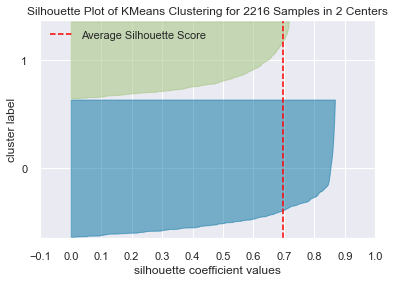

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2216 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [76]:
model = KMeans(2, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(mkt[['Age','Spent']])        # Fit the data to the visualizer
visualizer.show()

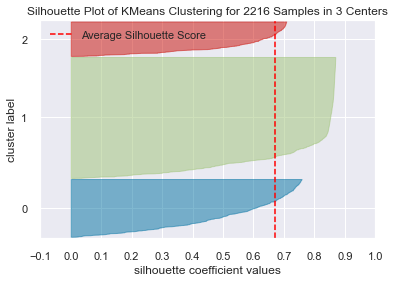

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2216 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [78]:
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(mkt[['Age','Spent']])        # Fit the data to the visualizer
visualizer.show()

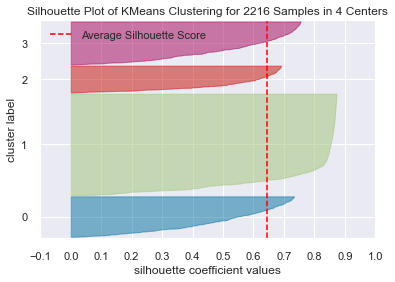

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2216 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [79]:
model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(mkt[['Age','Spent']])        # Fit the data to the visualizer
visualizer.show()

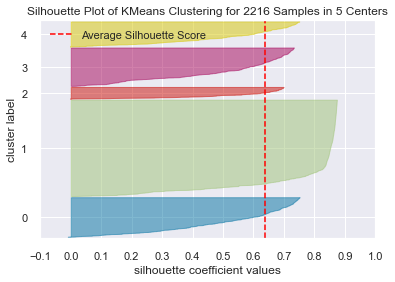

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2216 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [87]:

model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(mkt[['Age','Spent']])        # Fit the data to the visualizer
visualizer.show()

In [91]:
print('After looking at elbow model and silhouette visualization, 4 clusters could be the best option for the Kmeans Analysis')

After looking at elbow model and silhouette visualization, 4 clusters could be the best option for the Kmeans Analysis


In [84]:
# Train the clustering model with k=4
km = KMeans(n_clusters=4, random_state=42).fit(mkt[['Age','Spent']])
mkt['Cluster'] = km.labels_

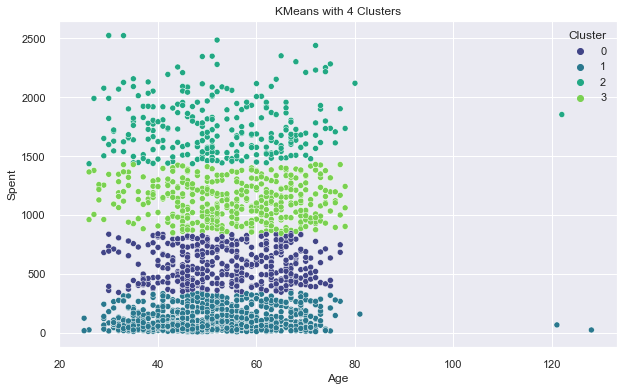

In [86]:
# Checking the distribution of each clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(mkt['Age'], mkt['Spent'], hue=mkt['Cluster'], 
                palette=sns.color_palette('viridis', 4))
plt.title('KMeans with 4 Clusters')
plt.show()